In [7]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### 5.1 1차원 이산형 확률변수

$f(x)=
\begin{cases}
\frac{x}{21}, \;(x\in{1,2,3,4,5,6})\\
0,\;(ohterwise)
\end{cases}$

In [3]:
# 확률 정의 함수
def f(x):
    if x in x_set:
        return x/21
    else:
        0

In [21]:
x_set = np.array([1,2,3,4,5,6])
X = [x_set, f]

In [5]:
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

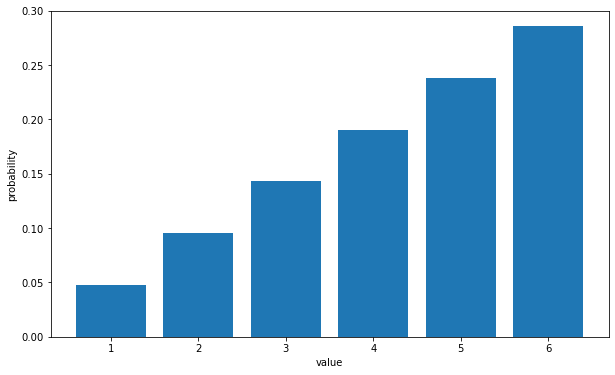

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

$f(x_k)\geq 0 \\
\sum_{k} f(x_k) = 1$

In [12]:
np.all(prob >= 0) #확률은 0이상

True

In [13]:
np.sum(prob) # 모든 확률의 합은 1

0.9999999999999999

$F(x)=P(X\leq x)=\sum_{x_k\leq x}f(x_k)$

In [14]:
# 누적분포함수
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [15]:
F(3)

0.2857142857142857

In [18]:
# 확률변수의 변환
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

$E(X)=\sum_{k}x_kf(x_k)$

In [19]:
# 기댓값
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [20]:
# 불공정주사위 100만번 굴린 값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.334798

In [29]:
import warnings
warnings.filterwarnings(action='ignore')

$E(g(X))=\sum_{k}g(x_k)f(x_k)$

In [22]:
# 기댓값 함수
def E(X, g=lambda x: x):
    x_set,f = X
    return np.sum(g(x_k)*f(x_k) for x_k in x_set)

In [31]:
E(X)

4.333333333333333

$E(aX+b)=aE(X)+b$

In [30]:
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [32]:
2*E(X)+3

11.666666666666666

$V(X)=\sum_{K}(x_k-\mu)^2f(x_k)$

In [33]:
# 분산
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

$V(g(X))=\sum_{k}(g(x_k))-E(g(X)))^2f(x_k)$

In [34]:
# 분산 함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [35]:
V(X)

2.2222222222222223

$V(aX+b)=a^2V(X)$

In [36]:
V(X, lambda x: 2*x+3)

8.88888888888889

In [37]:
2**2 * V(X)

8.88888888888889

### 2차원 이산형 확률변수

$f_{XY}(x,y)=
\begin{cases}
\frac{y(x-y)}{441}, \;(y\in \{1,2,3,4,5,6\}\ and\ x-y\in\{1,2,3,4,5,6\})\\
0,\;(ohterwise)
\end{cases}$

In [38]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [51]:
# 결합확률함수
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [52]:
XY = [x_set, y_set, f_XY]

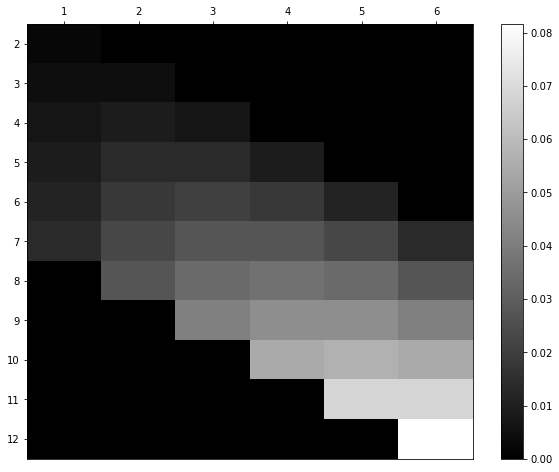

In [67]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1,7), minor=False)
ax.set_yticklabels(np.arange(2,13), minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.gray()
plt.show()

$f_{xy}(x_i,y_i)\geq 0 \\
\sum_i\sum_jf_{XY}(x_i,y_j)=1$

In [68]:
np.all(prob>=0)

True

In [69]:
np.sum(prob)

1.0

$f_X(x)=\sum_{k}f_{XY}(x,y_k)$

In [70]:
# 주변확률분포
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [73]:
X = [x_set, f_X]
Y = [y_set, f_Y]

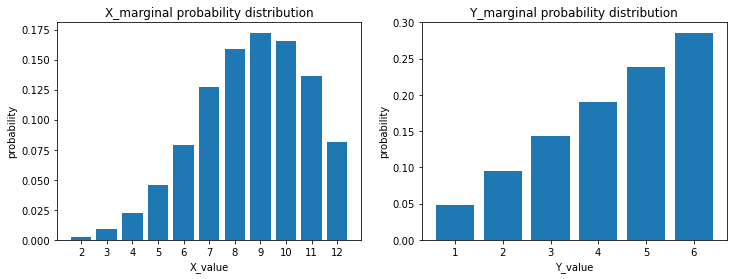

In [74]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

$\mu_X=E(X)=\sum_{i}\sum_{j}x_if_{XY}(x_i,y_j)$

In [75]:
# 기댓값
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

$E(g(X,Y))=\sum_{i}\sum_{j}g(x_i,y_j)f_{XY}(x_i,y_j)$

In [86]:
# 함수 g(X,Y)의 기댓값
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [84]:
def E(XY, g):
    x_set, y_set, XY = f_XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [78]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.666666666666666

In [80]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333333333333333

$E(aX+bY) = aE(X)+bE(Y)$

In [87]:
a, b = 2, 3
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [82]:
a*mean_X + b*mean_Y

30.333333333333332

$\sigma^2_X=V(X)=\sum_{i}\sum_{j}(x_i-\mu_X)^2f_{XY}(x_i,y_j)$

In [83]:
# 분산
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444444444444444

$V(g(X,Y))=\sum_{i}\sum_{j}(g(x_i,y_j)-E(g(X,Y)))^2f_{XY}(x_i,y_j)$

In [89]:
# 분산 함수
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [91]:
var_X = V(XY, g=lambda x,y: x)
var_X

4.444444444444444

In [93]:
var_Y = V(XY, g=lambda x,y: y)
var_Y

2.2222222222222223

$\sigma_{XY}=Cov(X,Y)=\sum_{i}\sum_{j}(x_i,\mu_X)(y_j-\mu_Y)f_{XY}(x_i,y_j)$

In [94]:
# 공분산 함수
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y: x)
    mean_Y = E(XY, lambda x,y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [95]:
cov_xy = Cov(XY)
cov_xy

2.222222222222222

$V(aX+bY) = a^2V(X)+b^2V(Y)+2abCov(X, Y)$

In [96]:
V(XY, lambda x,y: a*x+b*y)

64.44444444444444

In [97]:
(a**2*var_X)+(b**2*var_Y)+2*a*b*cov_xy

64.44444444444443

$\rho_{XY}=\rho(X,Y)=\frac{\sigma_{XY}}{\sigma_X\sigma_Y}$

In [98]:
cov_xy / np.sqrt(var_X*var_Y)

0.7071067811865474